In [22]:
import pandas as pd

from dynamo_pandas import put_df, get_df, keys
import boto3

# dynamo-pandas easy dataframe access from aws
df = get_df(table="DS3002_Project2")

# sort because NoSQL response is out of order
df = df.sort_values(by=['ID'])[["ID","factor","pi","time"]]

# view values
df.head().style.hide_index()

ID,factor,pi,time
1,12167,3.141675,2021-05-10 00:23:10
2,13824,3.141520,2021-05-10 00:24:10
3,15625,3.141657,2021-05-10 00:25:10
4,17576,3.141536,2021-05-10 00:26:10
5,19683,3.141643,2021-05-10 00:27:10


<AxesSubplot:xlabel='ID', ylabel='pi'>

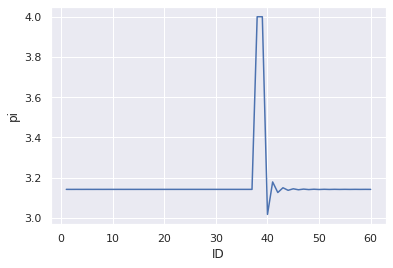

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# plot ID vs. pi - shows how the pi value changes each minute
sns.lineplot(data=df, x="ID", y="pi")

There's a huge spike somewhere between 35-40 minute mark, let's observe. 

In [21]:
df[36:41].style.hide_index()



ID,factor,pi,time
37,205379,3.141598,2021-05-10 00:59:10
38,1,4.000000,2021-05-10 01:00:10
39,1,4.000000,2021-05-10 01:01:10
40,8,3.017072,2021-05-10 01:02:10
41,27,3.178617,2021-05-10 01:03:10


Once the time hits 38 minutes, the time marker is back at 0 minutes for the hour, which explains why the jump occurred. 

In [ ]:
Plot values from 0-37 minutes, and then to 40-end minutes to see the pattern better. 


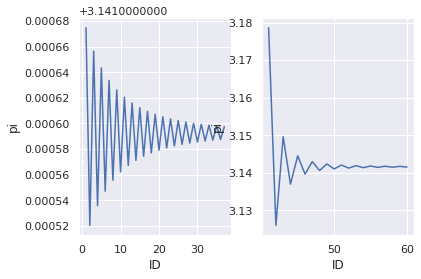

In [3]:
fig, axs = plt.subplots(ncols=2)

sns.lineplot(data=df[0:37], x="ID", y="pi", ax=axs[0])
sns.lineplot(data=df[40:], x="ID", y="pi", ax=axs[1])



It looks like the pi value is iterating back and forth, almost like an average precise value is being reached. 

Let's take a look at the factor variable.


<AxesSubplot:xlabel='ID', ylabel='factor'>

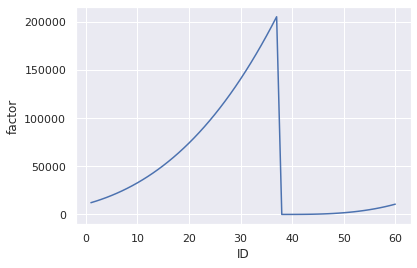

In [6]:
sns.lineplot(data=df, x="ID", y="factor")


It seems that the factor variable increases when the value reaches stability. Once the pi value hits 4.000000 during the hour reset, the factor drops down.



Let's look at it closer, now plotting the pi value vs. factor. 

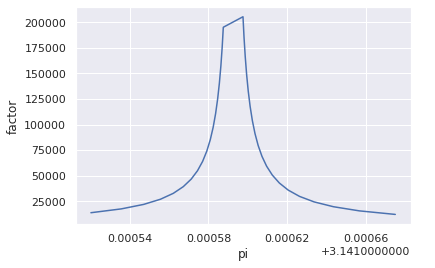

In [20]:
ax = sns.lineplot(data=df[0:37], x="pi", y="factor")

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)

plt.show()


It looks like the factor spikes up around a certain value of pi (probably its actual value). 

Based on this analysis, it looks like 